In [ ]:
! pip install pingouin

In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import pingouin as pg

In [3]:
data = pd.read_csv('../../processed-data/tidy_socialmedia_data.csv', index_col=0)
data.head()

,Participant,Date,Day,Time,Session.Name,Notification.No,LifePak.Download.No,Responded,Completed.Session,Session.Instance,...,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress,PSMU,News,ASMU,full_count
1,115091,2017-05-02,Tuesday,10:00:06,Daily questions,1,1,1,1,1.0,...,61.0,64.0,68.0,50.0,56.0,73.0,66.0,39.0,38.0,10
2,115091,2017-05-02,Tuesday,12:02:48,Daily questions,2,1,1,1,2.0,...,57.0,70.0,58.0,37.0,56.0,67.0,0.0,27.0,23.0,10
3,115091,2017-05-02,Tuesday,14:03:02,Daily questions,3,1,1,1,3.0,...,44.0,70.0,67.0,26.0,38.0,39.0,63.0,34.0,36.0,10
4,115091,2017-05-02,Tuesday,16:34:28,Daily questions,4,1,1,1,4.0,...,56.0,79.0,89.0,30.0,20.0,60.0,67.0,29.0,23.0,10
6,115091,2017-05-02,Tuesday,20:02:12,Daily questions,6,1,1,1,5.0,...,0.0,27.0,83.0,15.0,3.0,25.0,16.0,0.0,0.0,10


In [28]:
ESM_quest = data.iloc[:,12:-4]
ESM_quest.describe().round(1)

,Fatigue,LowMood,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress
count,8652.0,8647.0,8646.0,8643.0,8646.0,8646.0,8649.0,8648.0
mean,37.0,13.2,12.0,26.4,25.5,10.6,12.0,20.6
std,29.7,18.3,17.0,26.1,26.3,15.5,16.7,23.2
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,10.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
50%,30.0,6.0,5.0,19.0,18.0,3.0,5.0,14.0
75%,64.0,20.0,18.0,45.0,40.0,17.0,19.0,30.0
max,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [25]:
pcorr = ESM_quest.pcorr().round(3)
display(pcorr)

,Fatigue,LowMood,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress
Fatigue,1.000,0.058,0.018,0.219,0.328,-0.040,-0.033,0.103
LowMood,0.058,1.000,0.360,0.015,0.062,0.194,0.163,0.192
Loneliness,0.018,0.360,1.000,0.053,0.060,0.263,0.188,0.023
Concentrat,0.219,0.015,0.053,1.000,0.288,-0.002,0.040,0.198
LossOfInt,0.328,0.062,0.060,0.288,1.000,-0.002,0.078,0.031
Inferior,-0.040,0.194,0.263,-0.002,-0.002,1.000,0.322,0.037
Hopeless,-0.033,0.163,0.188,0.040,0.078,0.322,1.000,0.212
Stress,0.103,0.192,0.023,0.198,0.031,0.037,0.212,1.000


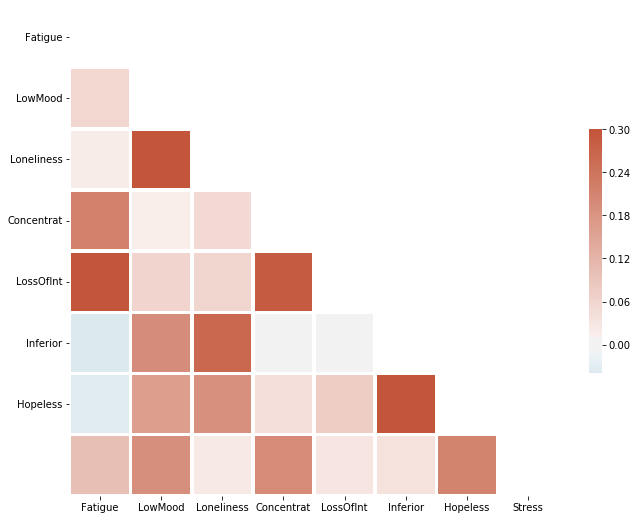

In [31]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(pcorr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(pcorr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=2.5, cbar_kws={"shrink": .5})
plt.yticks(np.arange(7)+0.5,('Fatigue','LowMood','Loneliness','Concentrat','LossOfInt','Inferior','Hopeless','Stress'), rotation=0, fontsize="10", va="center")
plt.savefig('../../figures/ESM_quest-heatmap-partialCorr.png')